In [2]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
import os
from collections import Counter


hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [39]:
v = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_LiangSteinProgenitor.txt.gz", sep = "\t")
Counter(v["SpecSup447_Cutoff"])

C:\Users\astar\AppData\Local\Temp\ipykernel_7832\3845909224.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_LiangSteinProgenitor.txt.gz", sep = "\t")


Counter({'<= 19': 16016,
         '19-104': 16016,
         '104-187': 16016,
         '187-242': 16016,
         '> 242': 16016})

In [63]:
v[v["TypeOfSampling"] == "Real"].head(50)

,SpecSup447_Cutoff,Metric,Median fixed absolute log fold-change,Number fixed variants,Median polymorphic absolute log fold-change,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling
0,<= 19,Absolute log fold-change,0.014263,497303,0.014638,241299,1.847712e-11,5.003112e-08,1.000000e+00,1.000000,-0.033901,0.014638,"[[244508, 252795], [120649, 120650]]","[[244508, 252795], [120651, 120648]]",0.500,All,Real,Real
1,<= 19,Absolute log fold-change,0.014263,497303,0.014638,241299,5.501409e-06,5.003112e-08,9.999973e-01,1.000000,-0.023312,0.019892,"[[196177, 301126], [96519, 144780]]","[[196177, 301126], [96520, 144779]]",0.600,All,Real,Real
2,<= 19,Absolute log fold-change,0.014263,497303,0.014638,241299,7.696720e-02,5.003112e-08,9.618456e-01,1.000000,-0.009635,0.027615,"[[148191, 349112], [72389, 168910]]","[[148191, 349112], [72390, 168909]]",0.700,All,Real,Real
3,<= 19,Absolute log fold-change,0.014263,497303,0.014638,241299,1.202413e-01,5.003112e-08,6.027907e-02,1.000000,0.009591,0.040325,"[[100229, 397074], [48259, 193040]]","[[100229, 397074], [48260, 193039]]",0.800,All,Real,Real
4,<= 19,Absolute log fold-change,0.014263,497303,0.014638,241299,7.151917e-12,5.003112e-08,3.597588e-12,1.000000,0.054611,0.066768,"[[52300, 445003], [24129, 217170]]","[[52300, 445003], [24130, 217169]]",0.900,All,Real,Real
5,<= 19,Absolute log fold-change,0.014263,497303,0.014638,241299,3.005968e-19,5.003112e-08,1.525552e-19,1.000000,0.095286,0.100077,"[[27339, 469964], [12064, 229235]]","[[27339, 469964], [12065, 229234]]",0.950,All,Real,Real
6,<= 19,Absolute log fold-change,0.014263,497303,0.014638,241299,1.631981e-17,5.003112e-08,8.551730e-18,1.000000,0.184074,0.214074,"[[6080, 491223], [2412, 238887]]","[[6080, 491223], [2413, 238886]]",0.990,All,Real,Real
7,<= 19,Absolute log fold-change,0.014263,497303,0.014638,241299,4.453093e-15,5.003112e-08,2.337250e-15,1.000000,0.229654,0.280764,"[[3223, 494080], [1206, 240093]]","[[3223, 494080], [1207, 240092]]",0.995,All,Real,Real
8,<= 19,Absolute log fold-change,0.029665,67672,0.029691,27872,9.432626e-01,6.048031e-01,5.322682e-01,0.302402,-0.001052,0.029693,"[[33817, 33855], [13935, 13937]]","[[33817, 33855], [13936, 13936]]",0.500,Top20th,Real,Real
9,<= 19,Absolute log fold-change,0.029665,67672,0.029691,27872,9.046105e-01,6.048031e-01,4.541736e-01,0.302402,0.001779,0.040804,"[[27097, 40575], [11148, 16724]]","[[27097, 40575], [11149, 16723]]",0.600,Top20th,Real,Real


C:\Users\astar\AppData\Local\Temp\ipykernel_18984\789921928.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_FilterNewTEs_LiangSteinNeuron.txt.gz", sep = "\t")


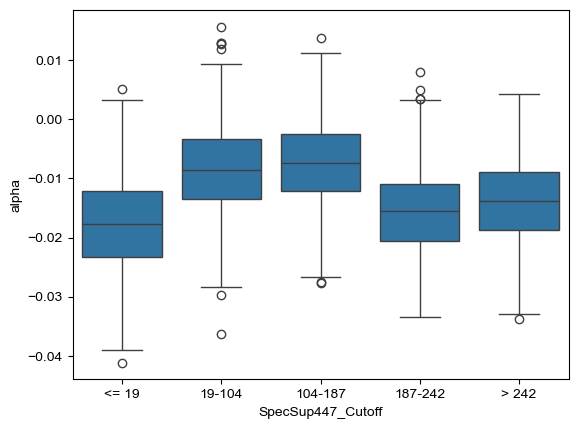

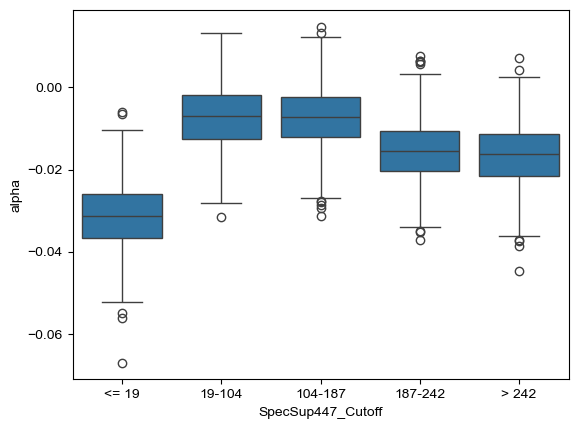

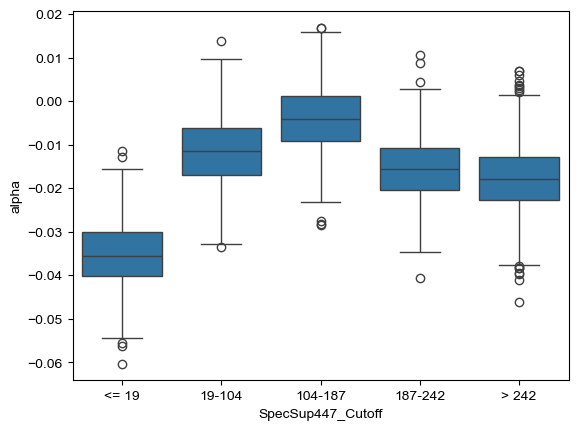

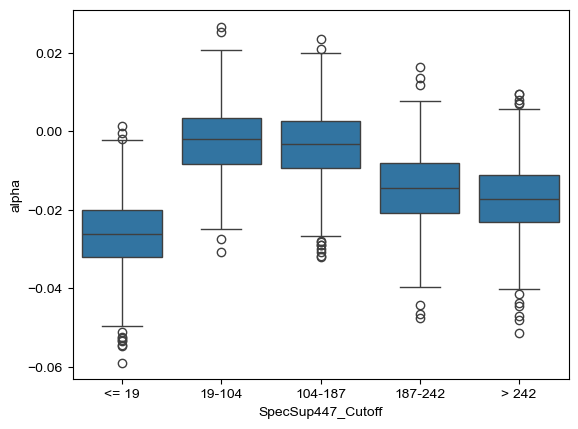

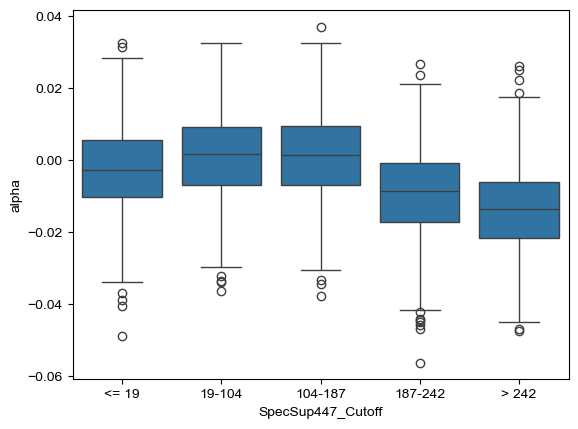

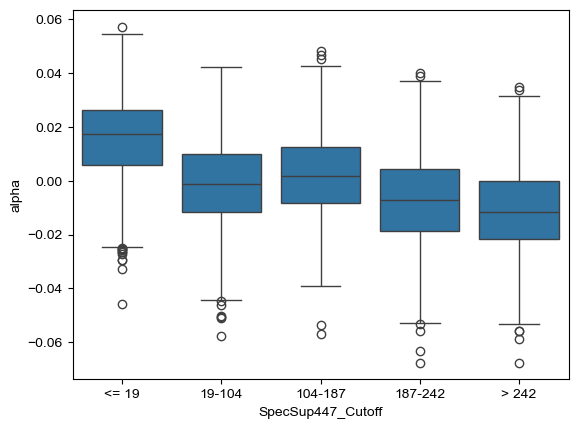

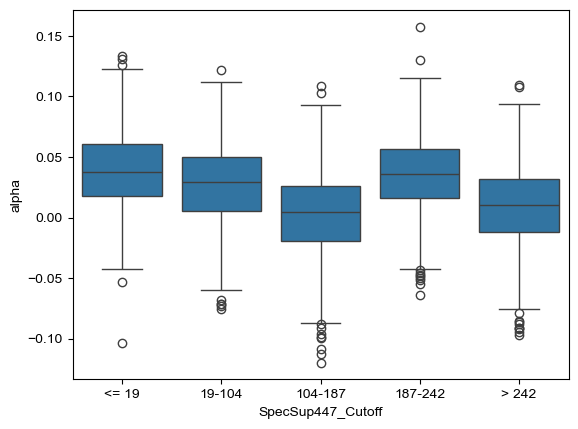

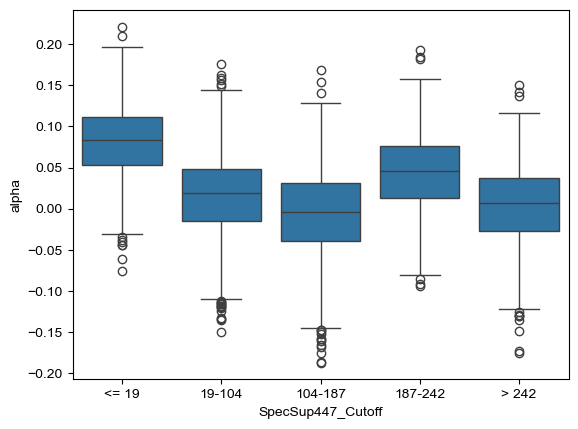

In [4]:
v = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_FilterNewTEs_LiangSteinNeuron.txt.gz", sep = "\t")

for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995]:
    v2 = v[v["Proportion"] == cutoff]
    v2 = v2[v2["Top_20th"] == "All"]
    sns.boxplot(data = v2, y = "alpha", x = "SpecSup447_Cutoff")
    plt.show()

In [22]:
df = pd.DataFrame()

cutoff = 0.95
for file in os.listdir("StratifySpecSup_Results"):
    if "FilterNewTEs" in file:
        v = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")

        v2 = v[v["Proportion"] == cutoff]
        v2 = v2[v2["Top_20th"] == "Top20th"]
        v2 = v2[v2["SpecSup447_Cutoff"].isin(["19-104", "> 242"])]
        v2["Cell type"] = np.repeat(file.replace("StratifiedBySpecSup_", "").replace(".txt.gz", ""), v2.shape[0])
        df = pd.concat([df, v2])
df

C:\Users\astar\AppData\Local\Temp\ipykernel_18984\368999637.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_18984\368999637.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_18984\368999637.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_18984\368999637.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_18984\368999637.py:6: DtypeW

,SpecSup447_Cutoff,Metric,Median fixed absolute log fold-change,Number fixed variants,Median polymorphic absolute log fold-change,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling,Cell type
16029,19-104,Absolute log fold-change,0.029179,106977,0.030004,34057,0.775922,0.000372,0.389344,0.999814,0.008445,0.146496,"[[5391, 101586], [1702, 32355]]","[[5391, 101586], [1703, 32354]]",0.95,Top20th,Real,Real,FilterNewTEs_AdultHeartSmoothMuscle
16045,19-104,Absolute log fold-change,0.029184,57483,0.029787,20054,0.348087,0.008499,0.173062,0.995751,0.035380,0.146959,"[[2975, 54508], [1002, 19052]]","[[2975, 54508], [1004, 19050]]",0.95,Top20th,0,Bootstrap,FilterNewTEs_AdultHeartSmoothMuscle
16061,19-104,Absolute log fold-change,0.029161,57483,0.030284,20054,0.190107,0.001922,0.908046,0.999039,-0.050913,0.148046,"[[2741, 54742], [1002, 19052]]","[[2741, 54742], [1003, 19051]]",0.95,Top20th,1,Bootstrap,FilterNewTEs_AdultHeartSmoothMuscle
16077,19-104,Absolute log fold-change,0.029047,57483,0.029439,20054,0.096440,0.016851,0.954465,0.991575,-0.065600,0.148947,"[[2705, 54778], [1002, 19052]]","[[2705, 54778], [1003, 19051]]",0.95,Top20th,2,Bootstrap,FilterNewTEs_AdultHeartSmoothMuscle
16093,19-104,Absolute log fold-change,0.029320,57483,0.030133,20054,0.769937,0.001556,0.623771,0.999222,-0.011164,0.148002,"[[2842, 54641], [1000, 19054]]","[[2842, 54641], [1004, 19050]]",0.95,Top20th,3,Bootstrap,FilterNewTEs_AdultHeartSmoothMuscle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80013,> 242,Absolute log fold-change,0.036885,45030,0.037527,15303,0.594631,0.210792,0.297263,0.894604,0.023516,0.217703,"[[2304, 42726], [765, 14538]]","[[2304, 42726], [766, 14537]]",0.95,Top20th,995,Bootstrap,FilterNewTEs_VIP
80029,> 242,Absolute log fold-change,0.036495,45030,0.036891,15303,0.064606,0.775030,0.032863,0.387515,0.075842,0.209400,"[[2429, 42601], [765, 14538]]","[[2429, 42601], [767, 14536]]",0.95,Top20th,996,Bootstrap,FilterNewTEs_VIP
80045,> 242,Absolute log fold-change,0.036774,45030,0.036929,15303,0.905898,0.787464,0.555443,0.606268,-0.004944,0.214923,"[[2242, 42788], [765, 14538]]","[[2242, 42788], [766, 14537]]",0.95,Top20th,997,Bootstrap,FilterNewTEs_VIP
80061,> 242,Absolute log fold-change,0.036558,45030,0.036529,15303,0.922973,0.678165,0.546807,0.339083,-0.004001,0.212575,"[[2244, 42786], [765, 14538]]","[[2244, 42786], [766, 14537]]",0.95,Top20th,998,Bootstrap,FilterNewTEs_VIP


In [1]:
medians = []
ci = []
palette = {}
for ct in np.unique(df["Cell type"]):
    for binn in np.unique(df["SpecSup447_Cutoff"]):
        dff = df[(df["Cell type"].isin([ct])) & (df["SpecSup447_Cutoff"].isin([binn]))]
        dff = dff.sort_values("alpha")
        ci.append([ct, list(dff["alpha"])[250], list(dff["alpha"])[9750]])
        medians.append([ct, binn, np.median(dff["alpha"])])
    
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])

df_ci = pd.DataFrame(ci)
df_ci.columns = ["CellType", "Lower95", "Upper95"]
df_ci = df_ci.sort_values("Lower95", ascending = False)

#for index, row in df_ci.iterrows():
#    if row["Lower95"] > 0:
#        palette[row["CellType"]] = "#F42FF5"
#    else:
#        palette[row["CellType"]] = "#40A94D"

fig, ax = plt.subplots(figsize = (18, 6))
sns.boxplot(data = df, y = "alpha", x = "Cell type", order = order, hue = "SpecSup447_Cutoff")
plt.ylim(-1, 1)
plt.ylabel("$\\alpha_{CA}$", size = 22)
plt.xticks(rotation = 90, size = 18)
#plt.title("Positive selection in HARs across cell types", size = 25)

df_ci

NameError: name 'np' is not defined

FilterNewTEs_AMY -0.1280913422219031 0.0380135573602956
FilterNewTEs_ASCT -0.1336723794606167 0.0722640113648416
FilterNewTEs_AdultHeartSmoothMuscle -0.0631250269599574 0.0746748825703708
FilterNewTEs_AdultHeartVentricularCardiomyocyte -0.0906532818965706 0.0774055335401032
FilterNewTEs_AdultLoopOfHenle -0.0569811315338827 0.0998686713887262
FilterNewTEs_AdultProximalTubule -0.1067602594752226 0.0436837046341146
FilterNewTEs_D1Pu -0.224995483519393 -0.0347056547040414
FilterNewTEs_FetalArterialECs -0.0123270672688463 0.1093403018965459
FilterNewTEs_FetalBrainCOP -0.030525814608891 0.1257878045684536
FilterNewTEs_FetalBrainFloorPlate -0.013993766565839 0.1444187096436946
FilterNewTEs_FetalBrainNeurCB_GNP_IPC_1 -0.0471577551043107 0.1243430625489739
FilterNewTEs_FetalBrainNeurDAergic 0.0082410687864062 0.1381668932000785
FilterNewTEs_FetalBrainNeurDRG_2 -0.0313452229381659 0.0974403164065146
FilterNewTEs_FetalBrainNeurGlioblast_CB_VZ -0.0472218996746812 0.112763407526854
FilterNewTEs_Fet

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'FilterNewTEs_FetalBrainNeurDAergic'),
  Text(1, 0, 'FilterNewTEs_FetalChondrocytes'),
  Text(2, 0, 'FilterNewTEs_FetalLeydigMale'),
  Text(3, 0, 'FilterNewTEs_FetalBrainFloorPlate'),
  Text(4, 0, 'FilterNewTEs_preGC_IIaFemale'),
  Text(5, 0, 'FilterNewTEs_FetalArterialECs'),
  Text(6, 0, 'FilterNewTEs_LiangSteinNeuron'),
  Text(7, 0, 'FilterNewTEs_FetalBrainCOP'),
  Text(8, 0, 'FilterNewTEs_SertoliMale'),
  Text(9, 0, 'FilterNewTEs_FetalBrainNeurGlioblast_CB_VZ'),
  Text(10, 0, 'FilterNewTEs_FetalGonadImmuneFemale'),
  Text(11, 0, 'FilterNewTEs_FetalBrainNeurPurkinje_6'),
  Text(12, 0, 'FilterNewTEs_FetalBrainNeurCB_GNP_IPC_1'),
  Text(13, 0, 'FilterNewTEs_FetalBrainNeurDRG_2'),
  Text(14, 0, 'FilterNewTEs_AdultLoopOfHenle'),
  Text(15, 0, 'FilterNewTEs_OGC'),
  Text(16, 0, 'Filte

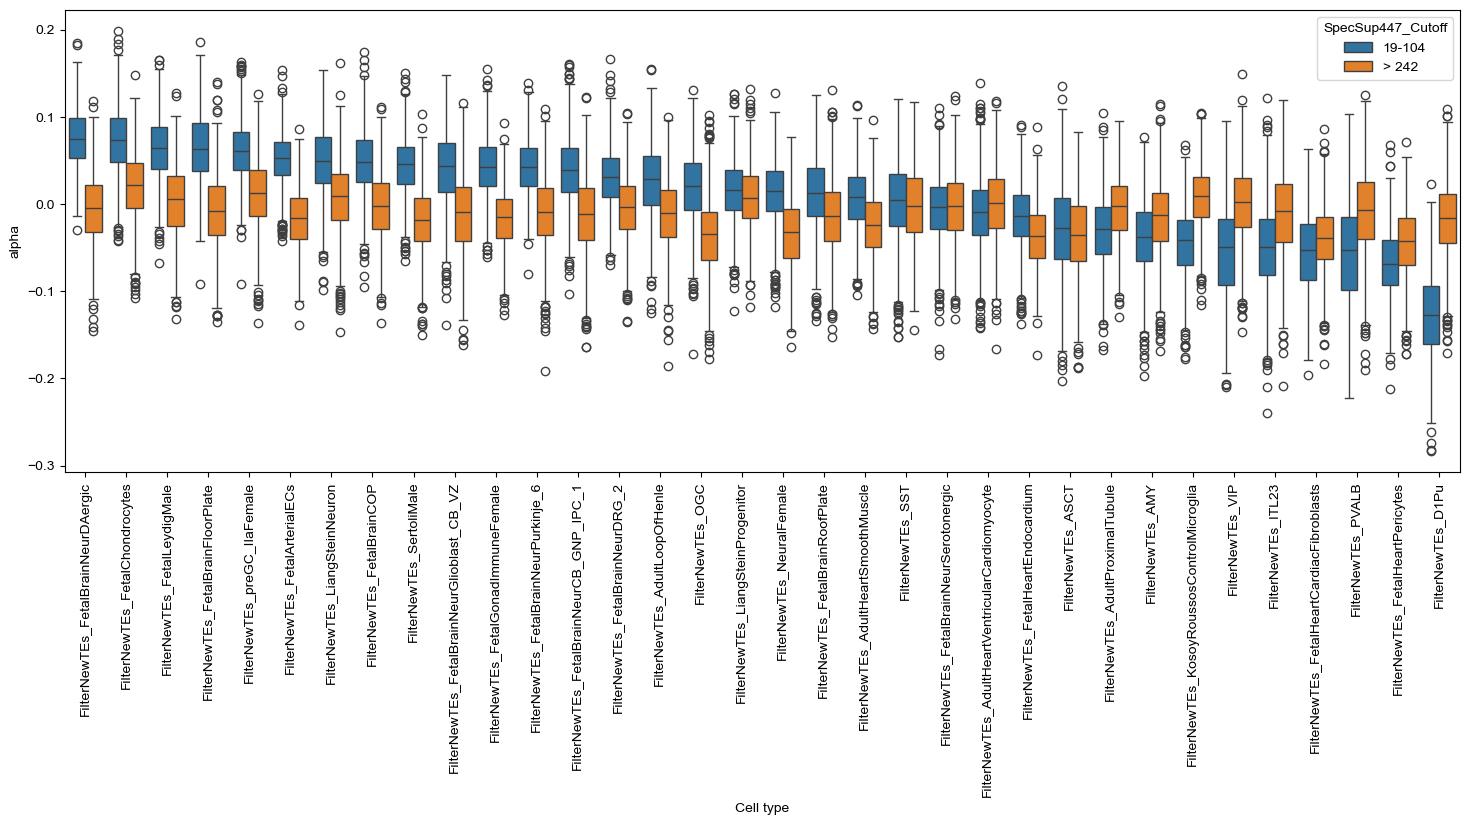

In [23]:
medians = []
for ct in np.unique(df["Cell type"]):
    dff = df[df["Cell type"].isin([ct])]
    dff = dff[dff["SpecSup447_Cutoff"] == "19-104"]
    dff = dff.sort_values("alpha")
    print(ct, list(dff["alpha"])[25], list(dff["alpha"])[975])
    medians.append([ct, np.median(dff["alpha"])])
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])

fig, ax = plt.subplots(figsize = (18, 6))
sns.boxplot(data = df, y = "alpha", x = "Cell type", order = order, hue = "SpecSup447_Cutoff")
#plt.ylim(-0.25, 0.15)
plt.xticks(rotation = 90)